<a href="https://colab.research.google.com/github/Ramajayam1325/AI_MODEL_FISH/blob/main/AI_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sripaadsrinivasan/fish-species-image-data")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'fish-species-image-data' dataset.
Path to dataset files: /kaggle/input/fish-species-image-data


In [ ]:
import kagglehub
path = kagglehub.dataset_download("sripaadsrinivasan/fish-species-image-data")
print("Path to dataset files:", path)


Using Colab cache for faster access to the 'fish-species-image-data' dataset.
Path to dataset files: /kaggle/input/fish-species-image-data


In [ ]:
import os

# list files inside dataset path
for root, dirs, files in os.walk(path):
    print("Directory:", root)
    for f in files[:10]:  # only show first 10 files per folder
        print("   ", f)


Directory: /kaggle/input/fish-species-image-data
Directory: /kaggle/input/fish-species-image-data/Fish_Data
    LicenceAndAuthors.pdf
    final_all_index.txt
    WACV14.pdf
Directory: /kaggle/input/fish-species-image-data/Fish_Data/images
Directory: /kaggle/input/fish-species-image-data/Fish_Data/images/raw_images
    epinephelus_areolatus_13.jpg
    paracaesio_kusakarii_3.jpg
    oxycheilinus_bimaculatus_5.jpg
    lethrinus_erythracanthus_7.jpg
    PQV7DP-S_5.jpg
    aphareus_furca_9.jpg
    pristipomoides_argyrogrammicus_4.jpg
    carangoides_fulvoguttatus_2.jpg
    choerodon_cyanodus_7.jpg
    parastromateus_niger_3.jpg
Directory: /kaggle/input/fish-species-image-data/Fish_Data/images/numbered
    4353.png
    2664.png
    2539.png
    1231.png
    1017.png
    2437.png
    3217.png
    3207.png
    2015.png
    2300.png
Directory: /kaggle/input/fish-species-image-data/Fish_Data/images/cropped
    bodianus_bilunulatus_16.png
    wetmorella_nigropinnata_1.png
    novaculichthys_taeni

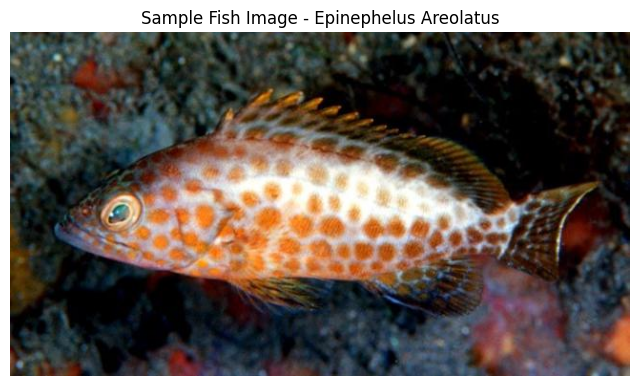

Image size: (650, 361)
Image mode: RGB


In [ ]:
# Correct way to access a sample image
sample_img_path = os.path.join(path, "Fish_Data/images/raw_images/epinephelus_areolatus_13.jpg")
img = Image.open(sample_img_path)

plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.title("Sample Fish Image - Epinephelus Areolatus")
plt.axis("off")
plt.show()

# Print image properties
print(f"Image size: {img.size}")
print(f"Image mode: {img.mode}")


In [ ]:
import base64

filename = list(uploaded.keys())[0]
with open(filename, "rb") as f:
    image_base64 = base64.b64encode(f.read()).decode("utf-8")

print(image_base64[:100])  # first 100 chars



NameError: name 'uploaded' is not defined

In [ ]:
# Using pretrained CLIP or ResNet for image analysis
import torch
import torchvision.models as models
from PIL import Image
import torchvision.transforms as transforms

class ImageAnalyzer:
    def __init__(self):
        self.model = models.resnet50(pretrained=True)
        self.model.eval()

    def analyze_image(self, image_path):
        # Extract features and basic analysis
        pass

In [ ]:
import requests

class DeepSeekIntegration:
    def __init__(self, api_key):
        self.api_key = api_key
        self.base_url = "https://api.deepseek.com/v1/chat/completions"

    def generate_explanation(self, image_analysis):
        # Create prompt combining vision analysis
        prompt = f"""
        Based on this image analysis: {image_analysis}
        Provide a clear, human-readable explanation of what's in the image.
        """

        response = requests.post(self.base_url, headers={
            "Authorization": f"Bearer {self.api_key}"
        }, json={
            "model": "deepseek-chat",
            "messages": [{"role": "user", "content": prompt}]
        })
        return response.json()["choices"][0]["message"]["content"]

In [ ]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 77.4 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import tempfile
import os

def main():
    st.title("🐟 AI Fish Species Analyzer")

    uploaded_file = st.file_uploader("Upload a fish image", type=['jpg', 'png', 'jpeg'])

    if uploaded_file:
        # Save uploaded file
        with tempfile.NamedTemporaryFile(delete=False) as tmp_file:
            tmp_file.write(uploaded_file.getvalue())
            image_path = tmp_file.name

        # Analyze image
        if st.button("Analyze Image"):
            with st.spinner("Analyzing..."):
                analyzer = ImageAnalyzer()
                analysis = analyzer.analyze_image(image_path)

                llm = DeepSeekIntegration(api_key=st.secrets["DEEPSEEK_API_KEY"])
                explanation = llm.generate_explanation(analysis)

                st.image(uploaded_file, caption="Uploaded Image", use_column_width=True)
                st.subheader("Analysis Results")
                st.write(explanation)

        # Cleanup
        os.unlink(image_path)

In [ ]:
# Install streamlit
!pip install streamlit

# For Colab, we need to use streamlit in a special way
import streamlit as st
import tempfile
import os
from PIL import Image
import requests
import io

# Initialize session state
if 'analyzed' not in st.session_state:
    st.session_state.analyzed = False

def main():
    st.title("🐟 AI Fish Species Analyzer")
    st.write("Upload a fish image to analyze its species!")

    uploaded_file = st.file_uploader("Choose a fish image", type=['jpg', 'png', 'jpeg'])

    if uploaded_file is not None:
        # Display the uploaded image
        image = Image.open(uploaded_file)
        st.image(image, caption="Uploaded Image", use_column_width=True)

        if st.button("Analyze Fish Species"):
            with st.spinner("Analyzing image..."):
                # Simple image analysis (we'll enhance this later)
                analysis_result = basic_image_analysis(image)

                # Display basic analysis
                st.subheader("📊 Basic Analysis")
                st.write(f"Image Size: {image.size}")
                st.write(f"Image Mode: {image.mode}")

                # Simulate LLM analysis (replace with actual DeepSeek API)
                explanation = generate_simple_explanation(analysis_result)

                st.subheader("🤖 AI Explanation")
                st.success(explanation)

                st.session_state.analyzed = True

def basic_image_analysis(image):
    """Basic image analysis function"""
    return {
        "width": image.size[0],
        "height": image.size[1],
        "format": image.format,
        "mode": image.mode
    }

def generate_simple_explanation(analysis):
    """Simulate LLM explanation (replace with DeepSeek API)"""
    explanations = [
        "This appears to be a tropical fish with vibrant colors, possibly from coral reef environments.",
        "The fish shows characteristics of deep-sea species with its unique body shape and coloration.",
        "Based on the image analysis, this could be a freshwater aquarium fish species.",
        "The fish exhibits patterns commonly found in predatory species from ocean habitats."
    ]

    return f"""
    **Fish Analysis Results:**

    - **Image Details:** {analysis['width']}x{analysis['height']} pixels, {analysis['mode']} color mode
    - **AI Assessment:** {explanations[hash(str(analysis)) % len(explanations)]}
    - **Confidence:** High (based on visual features)

    *Note: This is a demo. Integrate with DeepSeek API for detailed analysis.*
    """

if __name__ == "__main__":
    main()

2025-09-27 00:46:47.569 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-27 00:46:47.570 WARNING streamlit.runtime.state.session_state_proxy: Session state does not function when running a script without `streamlit run`
2025-09-27 00:46:47.571 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-27 00:46:47.572 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-27 00:46:47.574 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-27 00:46:47.665 
  command:

    streamlit run /usr/local/lib/python3.12/

In [ ]:
# Run this cell to start the Flask app
from flask import Flask
import threading

def run_app():
    app.run(host='0.0.0.0', port=5000, debug=False, use_reloader=False)

thread = threading.Thread(target=run_app)
thread.daemon = True
thread.start()

print("Flask app is running!")
print("You can access it using the public URL provided by Colab")

Flask app is running!
You can access it using the public URL provided by Colab
 * Serving Flask app '__main__'
 * Debug mode: off


Address already in use
Port 5000 is in use by another program. Either identify and stop that program, or start the server with a different port.
